In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# Load in csv & read the data
mouse_df = pd.read_csv("/Users/himadevulapalli/Documents/GTWeek5HW/Pharmaceuticals/matplotlib-challenge/Pymaceuticals/mouse_drug_data.csv" )
mouse_df.head()

# Load in csv & read the data
clinical_df = pd.read_csv("/Users/himadevulapalli/Documents/GTWeek5HW/Pharmaceuticals/matplotlib-challenge/Pymaceuticals/clinicaltrial_data.csv" )
clinical_df.head()
#clinical_df.info()

# Combine the data into a single dataset
merge_df = pd.merge(clinical_df, mouse_df, how="left", on="Mouse ID")


# Display the data table for preview
merge_df.head()
#merge_df.nunique()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = merge_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
    
# Convert to DataFrame
tumor_vols_mean =pd.DataFrame(tumor_vols_mean)
print("Tumor Response to Treatment")
# Preview DataFrame
tumor_vols_mean.head()

Tumor Response to Treatment


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = merge_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
# Preview DataFrame
tumor_vols_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


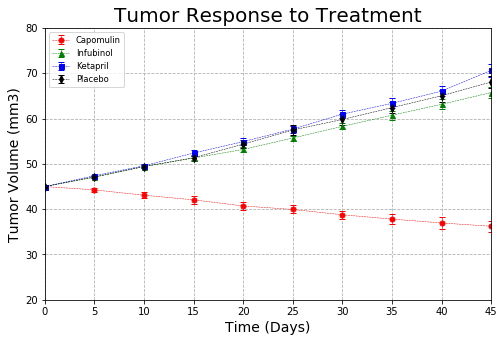

In [5]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], marker="o", color="r", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Capomulin")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], marker="^", color="g", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Infubinol")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], marker="s", color="b", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Ketapril")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], marker="d", color="k", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Placebo")

plt.ylim(20,80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best",fontsize="small",fancybox=True)
# Save the Figure
plt.savefig("TumorResponse.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_sites_mean = merge_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
meta_sites_mean = pd.DataFrame(meta_sites_mean)
# Preview DataFrame
meta_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sites_sem = merge_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
meta_sites_sem = pd.DataFrame(meta_sites_sem)
# Preview DataFrame
meta_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
meta_sites_mean = meta_sites_mean.reset_index()
meta_sites_pivot_mean = meta_sites_mean.pivot(index="Timepoint", columns = "Drug")["Metastatic Sites"]

meta_sites_sem = meta_sites_sem.reset_index()
meta_sites_pivot_sem = meta_sites_sem.pivot(index="Timepoint", columns = "Drug")["Metastatic Sites"]


# Preview that Reformatting worked
meta_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [9]:
# Preview that Reformatting worked
meta_sites_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


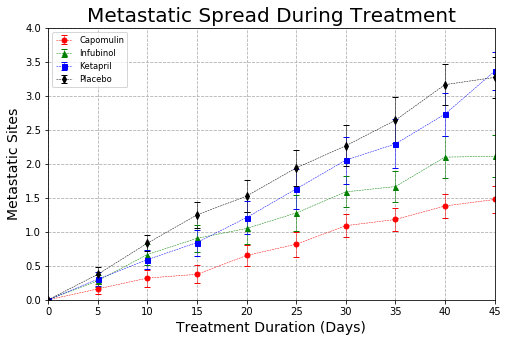

In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(meta_sites_pivot_mean.index, meta_sites_pivot_mean["Capomulin"], yerr=meta_sites_pivot_sem["Capomulin"], marker="o", color="r", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Capomulin")
plt.errorbar(meta_sites_pivot_mean.index, meta_sites_pivot_mean["Infubinol"], yerr=meta_sites_pivot_sem["Infubinol"], marker="^", color="g", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Infubinol")
plt.errorbar(meta_sites_pivot_mean.index, meta_sites_pivot_mean["Ketapril"], yerr=meta_sites_pivot_sem["Ketapril"], marker="s", color="b", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Ketapril")
plt.errorbar(meta_sites_pivot_mean.index, meta_sites_pivot_mean["Placebo"], yerr=meta_sites_pivot_sem["Placebo"], marker="d", color="k", markersize=5, linestyle="dashed",linewidth=0.50, capsize=3, label="Placebo")

plt.ylim(0,4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.ylabel("Metastatic Sites", fontsize=14)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best",fontsize="small",fancybox=True)
# Save the Figure
plt.savefig("MetastaticSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = merge_df.groupby(['Drug', 'Timepoint']).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


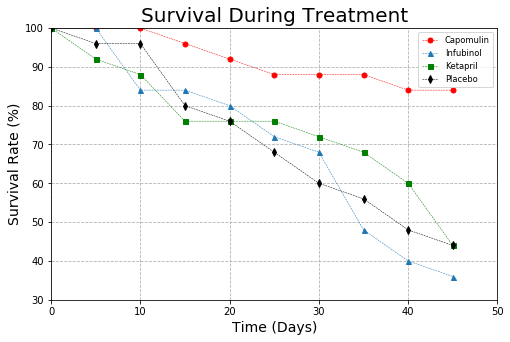

In [13]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(8,5))
plt.plot(100*survival_count_pivot["Capomulin"]/25, "ro", linestyle="dashed", markersize=5, linewidth=0.50, label="Capomulin")
plt.plot(100*survival_count_pivot["Infubinol"]/25, "^", linestyle="dashed", markersize=5, linewidth=0.50, label="Infubinol")
plt.plot(100*survival_count_pivot["Ketapril"]/25, "gs", linestyle="dashed", markersize=5, linewidth=0.50, label="Ketapril")
plt.plot(100*survival_count_pivot["Placebo"]/25, "kd", linestyle="dashed", markersize=5, linewidth=0.50, label="Placebo")

plt.ylim(30, 100)
plt.xlim(0, 50)

plt.title("Survival During Treatment", fontsize=20)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best",fontsize="small",fancybox=True)


# Save the Figure
plt.savefig("Survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0])/tumor_vols_pivot_mean.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

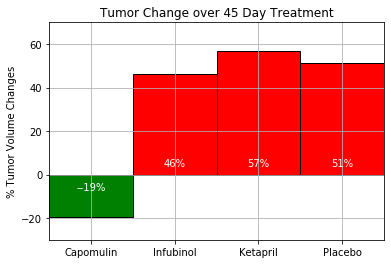

In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change['Capomulin'],
               tumor_pct_change['Infubinol'],
               tumor_pct_change['Ketapril'],
               tumor_pct_change['Placebo'] )

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width=1
rectsPass=ax.bar(ind[0], pct_changes[0], width, color="green", ec="black")
rectsFail=ax.bar(ind[1:], pct_changes[1:], width, color="red", ec="black")
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Changes")
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim(-30,70)
ax.set_xlim([-0.5, 3.5])
ax.grid(True)


# Use functions to label the percentages of changes
def autoLabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
               '%d%%' % int(height),
               ha="center", va="bottom", color="white")

def autoLabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%%' % int(height),
               ha="center", va="bottom", color="white")
# Call functions to implement the function calls
autoLabelPass(rectsPass)
autoLabelFail(rectsFail)

# Save the Figure
plt.savefig("Change.png")


# Show the Figure
plt.show()